# 1. Naive Bayes Introduction
- 1.1 Model Fitting & Prediction (using iris dataset)
- 1.2 Metric & Result Report
- 1.3 Feature Visualization

## 1.1 Model Fitting & Prediction

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
y_pred = clf.fit(iris.data, iris.target).predict(iris.data)

In [2]:
# Three classes in the dataset 
set(iris.target)

{0, 1, 2}

## 1.2 Metric & Result Report

In [3]:
# Accuracy score 
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(iris.target != y_pred).sum()))
print("Accruacy score is :", (iris.target == y_pred).sum() / len(iris.target))

Number of mislabeled points out of a total 150 points : 6
Accruacy score is : 0.96


In [4]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(iris.target, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00        50
    class 1       0.94      0.94      0.94        50
    class 2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150



In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

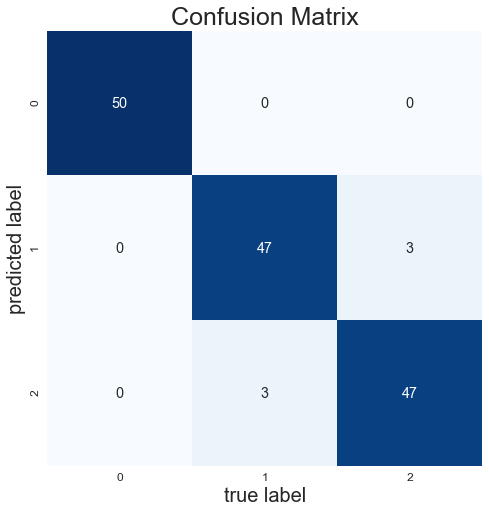

In [6]:
sb.set(font_scale=1.2)
plt.figure(figsize=(10,8))

mat = confusion_matrix(iris.target, y_pred)
sb.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap = 'Blues',
            xticklabels=set(iris.target), yticklabels=set(iris.target))

plt.xlabel('true label', fontsize = 20)
plt.ylabel('predicted label', fontsize = 20)
plt.title('Confusion Matrix', fontsize = 25)
plt.show()

## 1.3 Feature Visualization

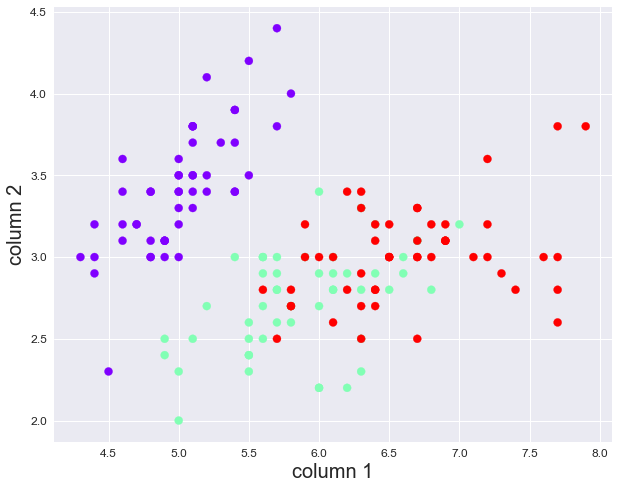

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=y_pred, cmap = 'rainbow', s=65)
plt.xlabel('column 1', fontsize = 20)
plt.ylabel('column 2', fontsize = 20)
plt.show()

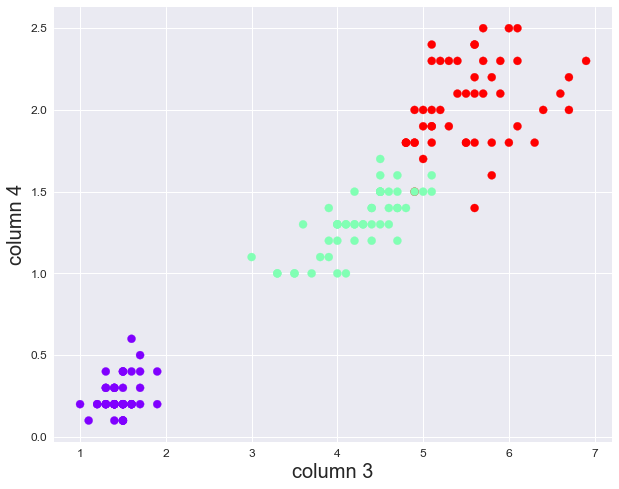

In [8]:
# Compared to using feature 1 & 2, using feature 3 & 4 could separate more among three labels 
plt.figure(figsize=(10,8))
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=y_pred, cmap = 'rainbow', s = 65)
plt.xlabel('column 3', fontsize = 20)
plt.ylabel('column 4', fontsize = 20)
plt.show()

# 2. How to improve Naive Bayes?
1. If continuous features do not have normal distribution, we should use transformation or different methods to convert it in normal distribution.
2. If test data set has zero frequency issue, apply smoothing techniques “Laplace Correction” to predict the class of test data set.
3. Remove correlated features, as the highly correlated features are voted twice in the model and it can lead to over inflating importance.
4. Naive Bayes classifiers has limited options for parameter tuning like alpha=1 for smoothing, fit_prior =[True|False] to learn class prior probabilities or not and some other options. I would recommend to focus on your  pre-processing of data and the feature selection.

# 3. Naive Bayes Summary
1. Naive Bayes works well when
    - The naive assumptions actually match the data (very rare in practice).
    - For very well-separated categories, when model complexity is less important.
    - For very high-dimensional data, when model complexity is less important.
        - As the dimension of a dataset grows, it is much less likely for any two points to be found close together. They need to be very close to each dimension.
2. Advantages
    - Extremely fast for both training and prediction.
    - Provide straightforward probabilistic prediction.
    - Often very easily interpretable.
    - Very few (if any) tunable parameters.
3. Disadvantages
    -  The final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results. 